Найти данные для классификации. Предобработать данные, если это необходимо.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
predictors = data.data
target = data.target
target_names = data.target_names
data.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Изобразить гистограмму, которая показывает баланс классов. Сделать выводы.

Text(0, 0.5, 'Частота')

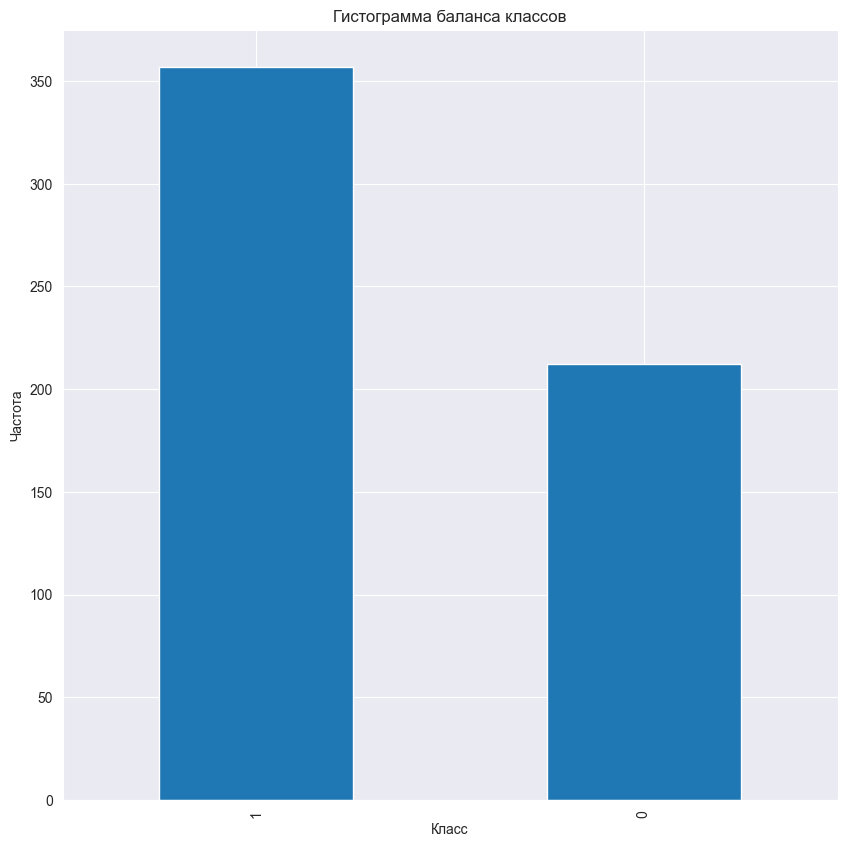

In [17]:
pd.value_counts(target).plot.bar()
plt.title('Гистограмма баланса классов')
plt.xlabel('Класс')
plt.ylabel('Частота')

Разбить выборку на тренировочную и тестовую. Тренировочная для обучения модели, тестовая для проверки ее качества.

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, shuffle=True, random_state=271)


Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей (использовать confusion_matrix из sklearn.metrics).

In [19]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model = LogisticRegression(random_state=271)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Предсказанные значения: \n', y_predict)
print('Исходные значения: \n', np.array(y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Предсказанные значения: 
 [1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 0 1]
Исходные значения: 
 [0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 0 0]
--- 0.05942678451538086 seconds ---


In [20]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Predict')

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


start_time = time.time()
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
params = {'kernel': param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid = params, cv = 6)
grid_search_svm.fit(x_train, y_train)
best_model = grid_search_svm.best_estimator_
print("--- %s seconds ---" % (time.time() - start_time))
best_model.kernel

--- 8.628020524978638 seconds ---


'linear'

In [22]:
svm_preds = best_model.predict(x_test)
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Predict')

In [23]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {'n_neighbors': number_of_neighbors}
grid_searck_knn = GridSearchCV(estimator=model_KNN, param_grid=params, cv = 6)

grid_searck_knn.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
grid_searck_knn.best_score_

--- 0.47917747497558594 seconds ---


0.9340350877192982

In [24]:
grid_searck_knn.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [25]:
knn_preds = grid_searck_knn.predict(x_test)
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Predict')

Сравнить результаты классификации, используя accuracy, precision, recall и f1-меру (можно использовать classification_report из sklearn.metrics). Также сравнить время работы алгоритмов. Сделать выводы.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        50
           1       0.90      0.98      0.94        64

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [27]:
print(classification_report(svm_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        45
           1       0.97      0.90      0.93        69

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [28]:
print(classification_report(knn_preds, y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.97      0.91      0.94        68

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

